<a href="https://colab.research.google.com/github/SalmaSherif7070/SVM_Kernels/blob/main/A3_%7C_SVM_Kernels_%7C_Salma_Sherif_202200622.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import itertools

from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
import seaborn as sns

from tqdm.notebook import tqdm_notebook as tqdm

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
path = "/content/Spiral.txt"
# path = "/content/Jain.txt"
df = pd.read_csv(path, skiprows=7, delimiter="\t", names=['x', 'y', 'label'])
df.head(10)

,x,y,label
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3
5,28.05,5.00,3
6,27.20,4.55,3
7,26.35,4.15,3
8,25.40,3.85,3
9,24.60,3.60,3


In [ ]:
df_shuffled = shuffle(df, random_state=42)
train, test = train_test_split(df_shuffled, test_size=0.2, random_state=42)
x_train, y_train = train[['x', 'y']].values, train['label'].values
x_test, y_test = test[['x', 'y']].values, test['label'].values

In [ ]:
clf1 = SVC(C=30, kernel='poly') # gamma = 0.5 (1/n_features)
clf2 = SVC(C=40, kernel='rbf') #gamma = 0.5 (1/n_features)
clf3 = SVC(C=30, kernel='poly', gamma = 0.001)
clf4 = SVC(C=40, kernel='rbf', gamma = 0.1)

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('bl

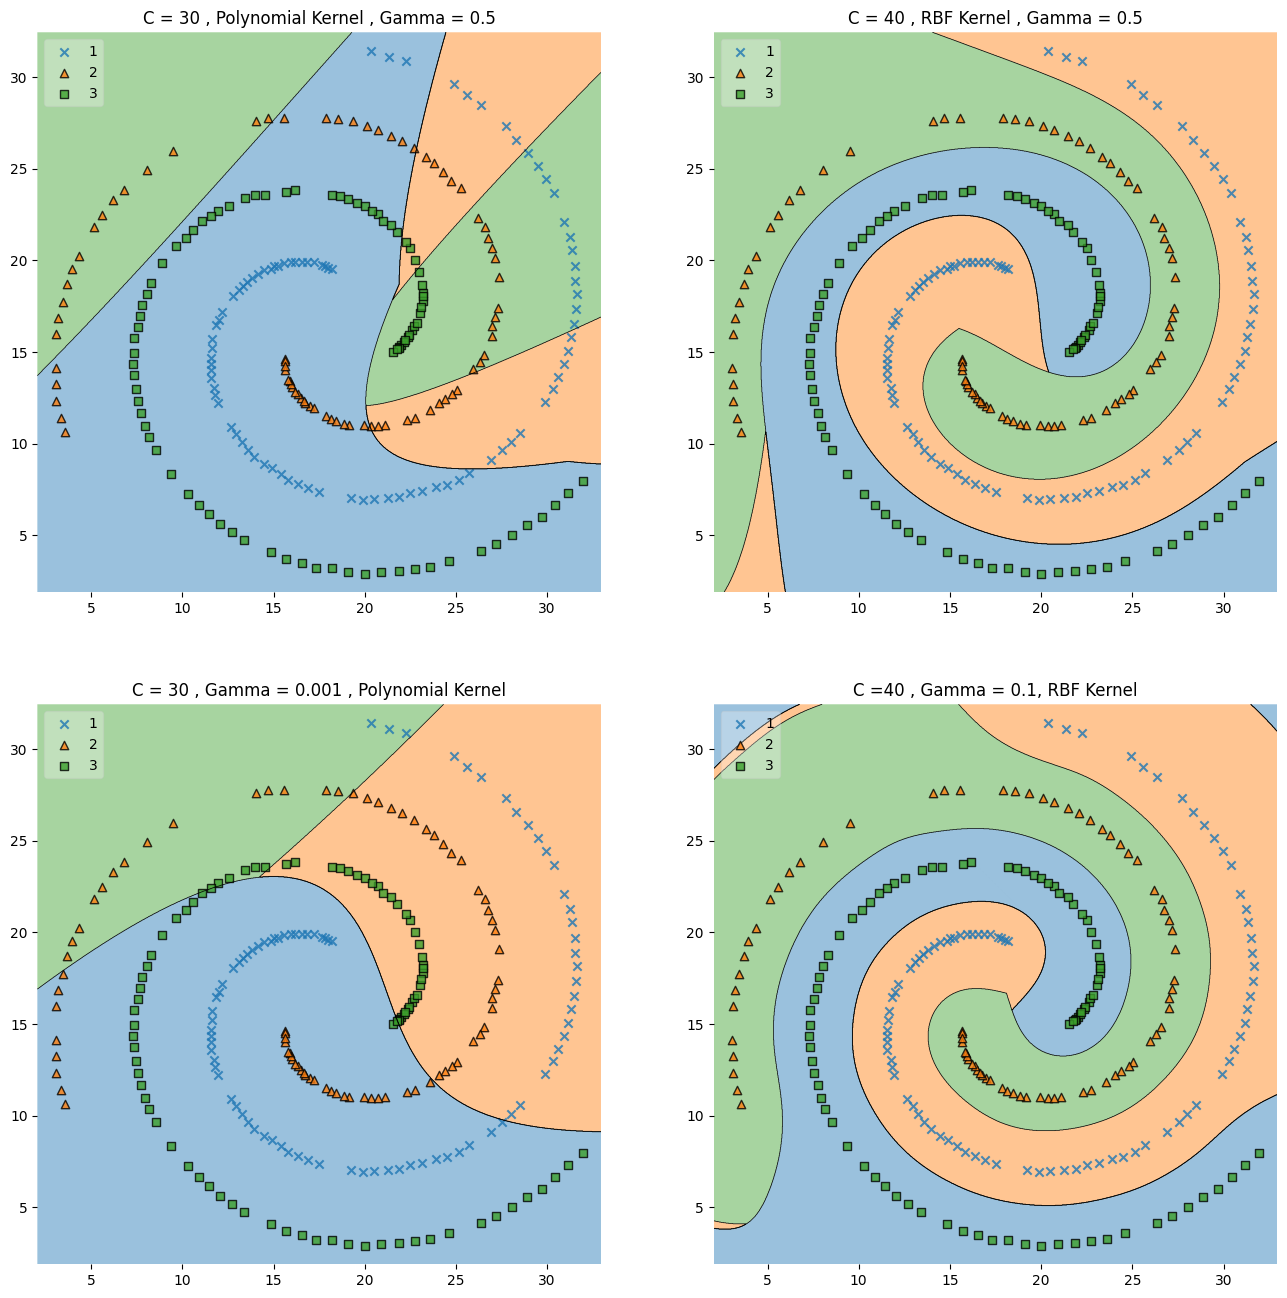

In [ ]:
# visualisation
scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7, 'linestyle':'-'}
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(16,16))
labels = ['C = 30 , Polynomial Kernel , Gamma = 0.5'  ,'C = 40 , RBF Kernel , Gamma = 0.5', 'C = 30 , Gamma = 0.001 , Polynomial Kernel'  ,'C =40 , Gamma = 0.1, RBF Kernel']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(x_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=x_train, y=y_train, clf=clf, legend=2, markers='x^sv<>')
    plt.title(lab)

plt.show()

In [ ]:
Best_acc = 0
Best_acc_index = 0
c = 0
for clf in [clf1, clf2, clf3, clf4]:
  c+=1
  clf.fit(x_train, y_train)
  predictions = clf.predict(x_test)
  print(f'The Accuracy of the {clf} classifier is', accuracy_score(predictions, y_test)*100, " %")
  if(Best_acc < accuracy_score(predictions, y_test)):
    Best_acc = accuracy_score(predictions, y_test)
    Best_acc_index = c
print("\n The best accuracy is ", Best_acc*100, " %")

The Accuracy of the SVC(C=30, kernel='poly') classifier is 49.2063492063492  %
The Accuracy of the SVC(C=40) classifier is 100.0  %
The Accuracy of the SVC(C=30, gamma=0.001, kernel='poly') classifier is 38.095238095238095  %
The Accuracy of the SVC(C=40, gamma=0.1) classifier is 100.0  %

 The best accuracy is  100.0  %


In [ ]:
import numpy as np
import pandas as pd

# Sample data
x1 = np.arange(-30, 60, 2)
x2 = np.arange(-30, 60, 2)

data = []
for i in range(len(x1)):
    for j in range(len(x2)):
        data.append({'x1': x1[i], 'x2': x2[j]})

df = pd.DataFrame(data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


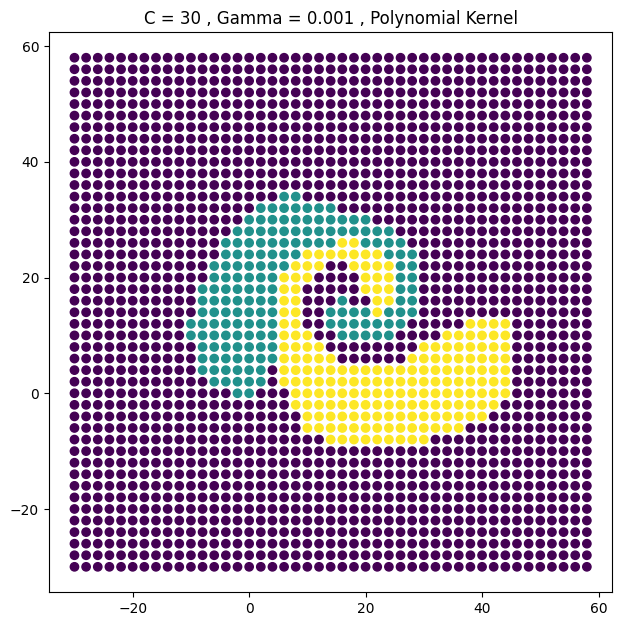

In [ ]:
scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7, 'linestyle':'-'}
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(16,16))
labels = ['C = 30 , Polynomial Kernel , Gamma = 0.5'  ,'C = 40 , RBF Kernel , Gamma = 0.5', 'C = 30 , Gamma = 0.001 , Polynomial Kernel'  ,'C =40 , Gamma = 0.1, RBF Kernel']

classifiers = [clf1, clf2, clf3, clf4]
for i in range(len(classifiers)):
  if i == Best_acc_index:
    clf = clf2
    lab = labels[i]
    clf.fit(x_train, y_train)
    y_pred = clf.predict(df[['x1', 'x2']])

    ax = plt.subplot(gs[i // 2, i % 2])
    plt.scatter(df['x1'], df['x2'], c=y_pred, cmap='viridis')
    plt.title(lab)

plt.show()